<a href="https://colab.research.google.com/github/uol-mediaprocessing/notebooks/blob/master/3-color-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color Models

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

First of all, let's load a picture:


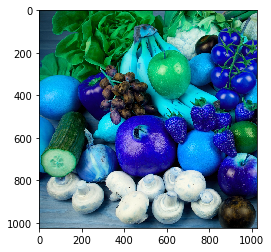

In [12]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/notebooks/master/pictures/image36.jpg
img = cv2.imread("image36.jpg")
plt.imshow(img)
plt.show()

As you can see, the picture doesn't look right. This is because **OpenCV** uses the **BGR** colorspace by default, while **matplotlib** uses **RGB**. So, we need to convert the image.

You can either do this manually by **changing the order of the channels** with numpy:

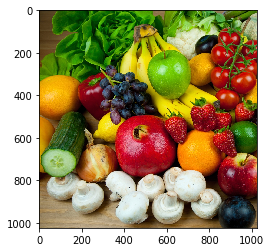

In [17]:
rgb = img[..., ::-1]
plt.imshow(rgb)
plt.show()

Alternatively, you can use the **OpenCV** function **cvtColor**:

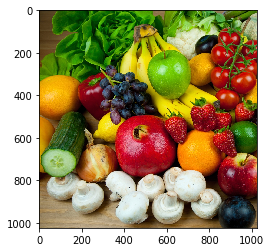

In [18]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

# Histogram
Histograms are graphical representations of the tonal distribution in a digital image. We can create them with `matplotlib` like this:

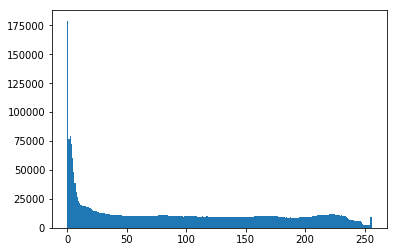

In [20]:
plt.hist(rgb.ravel(), 256, [0,256])
plt.show()

#RGB Color Space
To access the individual channels of the image, we can use numpy:

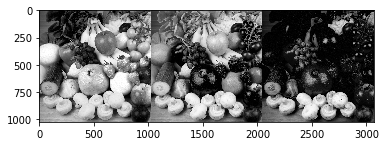

In [22]:
r_channel = np.copy(rgb)[..., 0]
g_channel = np.copy(rgb)[..., 1]
b_channel = np.copy(rgb)[..., 2]

vis = np.concatenate((r_channel, g_channel, b_channel), axis=1)
plt.imshow(vis, cmap="gray")
plt.show()

## RGB Histograms

Now, we can also create a histogram for the individual channels:

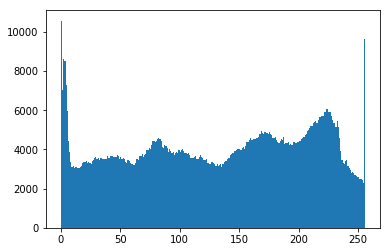

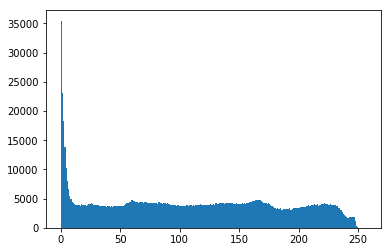

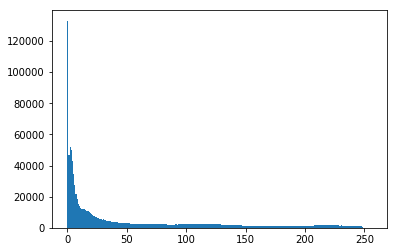

In [23]:
plt.hist(r_channel.ravel(), 256, [0,256])
plt.show()
plt.hist(g_channel.ravel(), 256, [0,256])
plt.show()
plt.hist(b_channel.ravel(), 256, [0,256])
plt.show()

# Grayscale
To convert an image to grayscale, we can use the formula from the lecture: 

$Y = Lum(R,G,B) = w_r * R + w_g * G + w_b * B$ 

with $w_r = 0.299$, $w_g = 0.587$ and $w_b = 0.114$

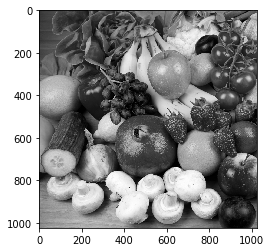

In [26]:
r = rgb[..., 0] * 0.299
g = rgb[..., 1] * 0.587
b = rgb[..., 2] * 0.114

grayscale = r + g + b

plt.imshow(grayscale, cmap="gray")
plt.show()

Or, we can convert it with the `cvtColor` function from `OpenCV`:

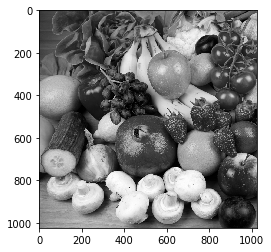

In [27]:
grayscale = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(grayscale, cmap="gray")
plt.show()

# HSV Color Space
Another color space is HSV (Hue, Saturation, Value). Again, we can convert our image with the `cvtColor` function:

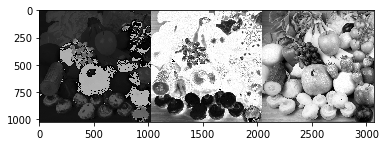

In [30]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h_channel = hsv[..., 0]
s_channel = hsv[..., 1]
v_channel = hsv[..., 2]

vis = np.concatenate((h_channel, s_channel, v_channel), axis=1)
plt.imshow(vis, cmap="gray")
plt.show()

This colorspace is particularly useful for thresholding. For example, we can threshold the Saturation channel like this:

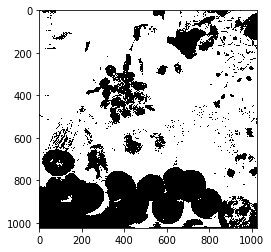

In [40]:
sat_thresholded = s_channel > 150
plt.imshow(sat_thresholded, cmap="gray")